In [205]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gdp

# headers
geo_df = gdp.read_file("data_task/geoJSONGrids.geojson")
geo_df.head()

,citygrid_num,wd_s_d_sd_tv_ward,wd_ward_name,wd_city_name,latitude,longitude,geometry
0,bang_cell_17024,29_572_99999_803162_159,Kengeri,Bangalore,12.903687,77.461403,"POLYGON ((77.45932 12.90577, 77.46349 12.90577..."
1,bang_cell_17025,29_572_99999_803162_159,Kengeri,Bangalore,12.899520,77.461403,"POLYGON ((77.45932 12.90160, 77.46349 12.90160..."
2,bang_cell_17245,29_572_99999_803162_159,Kengeri,Bangalore,12.907853,77.465569,"POLYGON ((77.46349 12.90994, 77.46765 12.90994..."
3,bang_cell_17246,29_572_99999_803162_159,Kengeri,Bangalore,12.903687,77.465569,"POLYGON ((77.46349 12.90577, 77.46765 12.90577..."
4,bang_cell_17247,29_572_99999_803162_198,Hemmigepura,Bangalore,12.899520,77.465569,"POLYGON ((77.46349 12.90160, 77.46765 12.90160..."


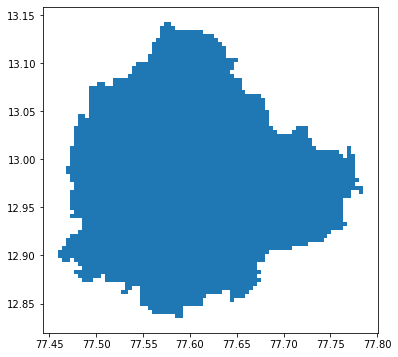

In [206]:
# ploating of the data
geo_df = gdp.read_file("data_task/geoJSONGrids.geojson")
geo_df.plot(figsize=(6, 6))
plt.show()


Text(0.5, 1.0, 'Night Lights')

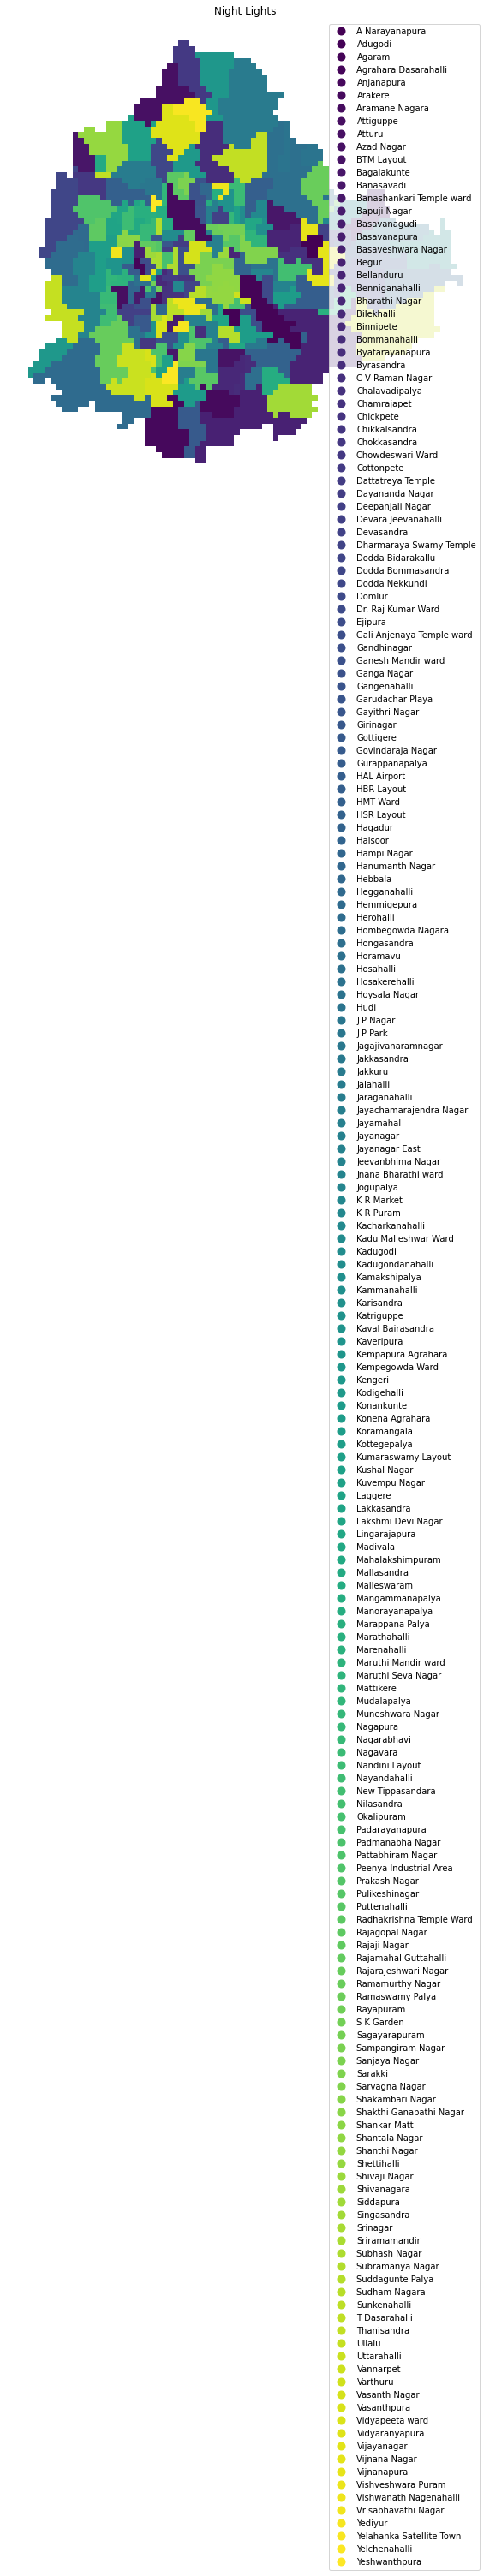

In [207]:
# tried to plot with metaploatlib of NL DATA

geo_df = gdp.read_file("data_task/geoJSONGrids.geojson")
fig, ax = plt.subplots(figsize=(10,10))
ax.set_axis_off() 
geo_df.plot(ax=ax, color='lightgrey')
geo_df.plot(column='wd_ward_name', ax=ax, cmap='viridis', legend=True)
plt.title('Night Lights')

Text(0.5, 1.0, 'Night Lights by (WARDS - bengaluru)')

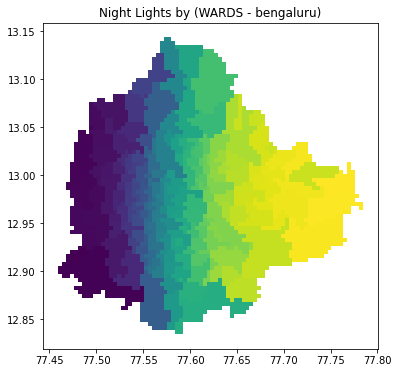

In [224]:
# based on WARDS - NIGHT LIGHT

geo_df = gdp.read_file("data_task/geoJSONGrids.geojson")
wards = geo_df.dissolve(by='wd_ward_name').reset_index()
fig, ax = plt.subplots(figsize=(12, 6))                   
wards.plot(column='citygrid_num', ax=ax, cmap='viridis')
plt.title('Night Lights by (WARDS - bengaluru)')

In [244]:
'''
This is the implementation of Nigh Light map of benguluru for 2019 based on provided data files
'''


# geoJSON data for geo_data (group by ward_name)
geo_df = geo_df.dissolve(by='wd_ward_name').reset_index()
geo_df = geo_df[['wd_ward_name','geometry']]


# Night Light data from the excel file (group by ward_name)
excel = pd.read_excel("data_task/extractedData_NL2019Column.xlsx", sheet_name="extractedData_NL2019")
wards = excel.groupby(['wd_ward_name']).sum()
wards = wards[['2019NL']]


# merged data
f_data=geo_df.merge(wards, on="wd_ward_name")
f_data.head()


nl_map = folium.Map(cmap='viridis', location=[13.00, 77.62], zoom_start=11, tiles="CartoDB positron", name="Night Light Map 2019 BLR")

myscale = (f_data['2019NL'].quantile((0,0.1,0.75,0.9,0.98,1))).tolist()
folium.Choropleth(
 geo_data=geo_df,
 name='Choropleth',
 data=f_data,
 columns=['wd_ward_name','2019NL'],
 key_on="feature.properties.wd_ward_name",
 fill_color='YlGnBu',
 threshold_scale=myscale,
 fill_opacity=1.2,
 line_opacity=0.2,
 legend_name='NIGHT LIGHT 2019 (BENGALURU)').add_to(nl_map)

nl_map

In [245]:
# just a map of Bengaluru WARDS

geo_df = gdp.read_file("data_task/geoJSONGrids.geojson")
wards = geo_df.dissolve(by='wd_ward_name').reset_index()
gjson = wards.to_crs(epsg='4326').to_json()
_map = folium.Map([13.00, 77.62], zoom_start=11, tiles='CartoDB dark_matter')

m_points = folium.features.GeoJson(gjson)
_map.add_child(points)
_map